<a href="https://colab.research.google.com/github/sudheer2226/Fake_Account_Detection/blob/main/FAKE_ACC_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Load your dataset from Kaggle
data = pd.read_csv('/content/final-v1 (1).csv')

# Inspect the first few rows
print(data.head())

   edge_followed_by  edge_follow  username_length  username_has_number  \
0             0.001        0.257               13                    1   
1             0.000        0.958                9                    1   
2             0.000        0.253               12                    0   
3             0.000        0.977               10                    1   
4             0.000        0.321               11                    0   

   full_name_has_number  full_name_length  is_private  is_joined_recently  \
0                     1                13           0                   0   
1                     0                 0           0                   1   
2                     0                 0           0                   0   
3                     0                 0           0                   0   
4                     0                11           1                   0   

   has_channel  is_business_account  has_guides  has_external_url  is_fake  
0            0 

In [13]:
# Handle missing data
data = data.fillna(method='ffill')  # Or you can use another method, like dropping rows

# Check for missing data
print(data.isnull().sum())

# Convert categorical features to numerical using one-hot encoding if needed
data = pd.get_dummies(data)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('is_fake', axis=1))  # Assuming 'target_column' is the label

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64


<ipython-input-13-2bc6a5931695>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Or you can use another method, like dropping rows


In [14]:
# Text preprocessing example (assuming a 'bio' or text column exists)
# Since you don't have a text column like 'bio' or 'post', we'll focus only on numerical columns

# Assuming you have a text column like 'bio' (hypothetical)
def preprocess_text(text):
    if isinstance(text, str):  # Ensure it's a string
        # Tokenization
        tokens = word_tokenize(text.lower())

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

        return ' '.join(tokens)
    else:
        return text  # If it's not a string, return the input as is (e.g., for numeric data)

# Example: Apply text preprocessing to a 'bio' column (if it existed)
# Replace 'bio' with the actual name of your text column if you have one
# data['processed_bio'] = data['bio'].apply(preprocess_text)

# Since you don't have a 'bio' column, you can directly work with numeric features:
# Example: If you want to work with a numeric column, you can simply use it as-is.
data['username_length'] = data['username_length']  # No text processing is needed here

# Continue with the rest of the model-building process.

In [15]:

X = scaled_features  # Features excluding the target column
y = data['is_fake']  # Target column (real or fake)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.94      1.00      0.97       208

    accuracy                           0.94       236
   macro avg       0.97      0.77      0.83       236
weighted avg       0.95      0.94      0.94       236



In [17]:
# Initialize the logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        28
           1       0.95      0.99      0.97       208

    accuracy                           0.94       236
   macro avg       0.90      0.80      0.84       236
weighted avg       0.94      0.94      0.94       236



In [18]:
# Initialize the SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.95      0.99      0.97       208

    accuracy                           0.94       236
   macro avg       0.91      0.81      0.85       236
weighted avg       0.94      0.94      0.94       236



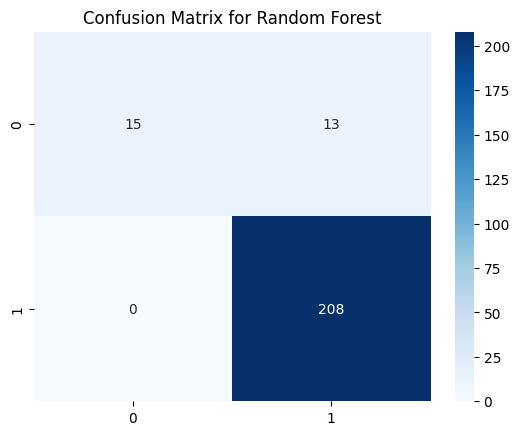

In [19]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()